In [8]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv("../data/data_clean.csv")
data.fl_date_dep = pd.to_datetime(data.fl_date_dep)
data.fl_date_arr = pd.to_datetime(data.fl_date_arr)

In [4]:
data = data.set_index("fl_date_arr", drop=False)
data = data.sort_index()

In [5]:
liste_days = ["Monday", "Tuesday", " Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
liste_months = list(data.index.month_name().unique())

In [6]:
data.describe()

,crs_dep_time,crs_arr_time,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_day_num,dep_day_num,arr_day_of_year,dep_day_of_year,arr_hour,dep_hour,month,week,days2holdays
count,5.538144e+06,5.538144e+06,5.538144e+06,5.538144e+06,964239.000000,964239.000000,964239.000000,964239.000000,964239.000000,5.538144e+06,5.538144e+06,5.538144e+06,5.538144e+06,5.538144e+06,5.538144e+06,5.538144e+06,5.538144e+06,5.538144e+06
mean,1.330214e+03,1.490189e+03,3.519293e+00,8.512796e+02,20.257775,2.702736,14.696167,0.084963,24.328406,2.928569e+00,2.931701e+00,1.844674e+02,1.844463e+02,1.458344e+01,1.336113e+01,6.545384e+00,2.677199e+01,1.987028e+01
std,4.894476e+02,5.160462e+02,4.187332e+01,6.200882e+02,57.341275,21.394475,30.584197,2.419614,45.963177,1.983176e+00,1.985438e+00,1.040528e+02,1.040537e+02,5.448439e+00,4.952214e+00,3.397136e+00,1.486588e+01,1.702706e+01
min,1.000000e+00,1.000000e+00,-1.520000e+02,2.800000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,9.150000e+02,1.105000e+03,-1.400000e+01,3.910000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,9.600000e+01,9.600000e+01,1.100000e+01,9.000000e+00,4.000000e+00,1.400000e+01,6.000000e+00
50%,1.325000e+03,1.520000e+03,-6.000000e+00,6.790000e+02,1.000000,0.000000,2.000000,0.000000,2.000000,3.000000e+00,3.000000e+00,1.850000e+02,1.850000e+02,1.500000e+01,1.300000e+01,7.000000e+00,2.700000e+01,1.500000e+01
75%,1.735000e+03,1.920000e+03,6.000000e+00,1.096000e+03,18.000000,0.000000,19.000000,0.000000,30.000000,5.000000e+00,5.000000e+00,2.740000e+02,2.740000e+02,1.900000e+01,1.800000e+01,9.000000e+00,3.900000e+01,2.900000e+01
max,2.359000e+03,2.400000e+03,2.142000e+03,4.983000e+03,2142.000000,1157.000000,1446.000000,474.000000,1484.000000,6.000000e+00,6.000000e+00,3.660000e+02,3.660000e+02,2.300000e+01,2.300000e+01,1.200000e+01,5.300000e+01,6.600000e+01


# Overall delay

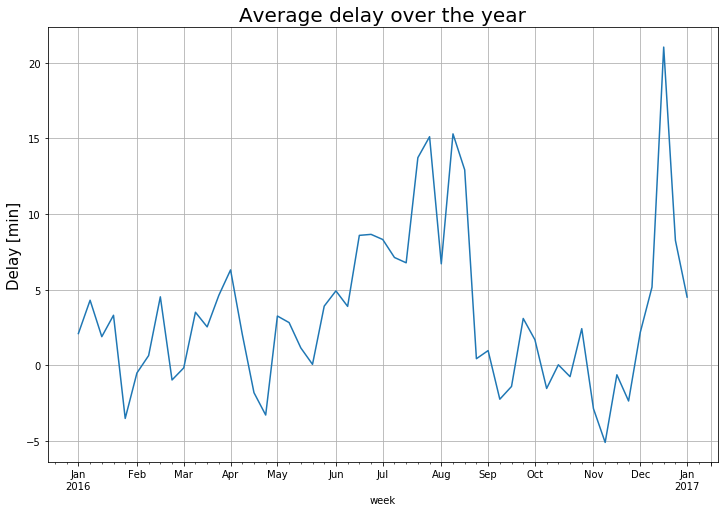

In [9]:
fig = plt.figure(figsize=(12,8))
data.resample('W').arr_delay.mean().plot()
plt.title("Average delay over the year", fontsize=20)
plt.ylabel("Delay [min]", fontsize=15)
plt.xlabel("week")
plt.grid()


Text(0.5,0,'Day of the week')

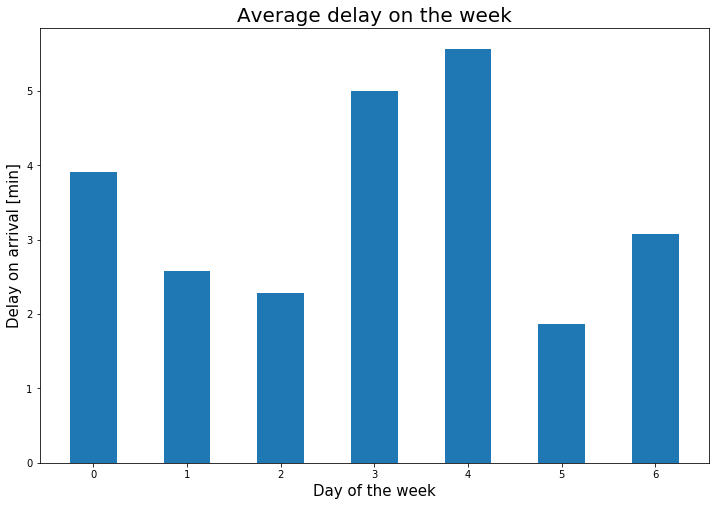

In [12]:
g = data.groupby(data.index.dayofweek).arr_delay.mean()
fig = plt.figure(figsize=(12,8))
ax = plt.bar(g.index, g, width=0.5)
#data.groupby('arr_day').arr_delay.mean().plot(kind="bar")
plt.title("Average delay on the week", fontsize=20)
plt.ylabel("Delay on arrival [min]", fontsize=15)
plt.xlabel("Day of the week", fontsize=15)
#plt.xticks(g.index, labels=liste_days);

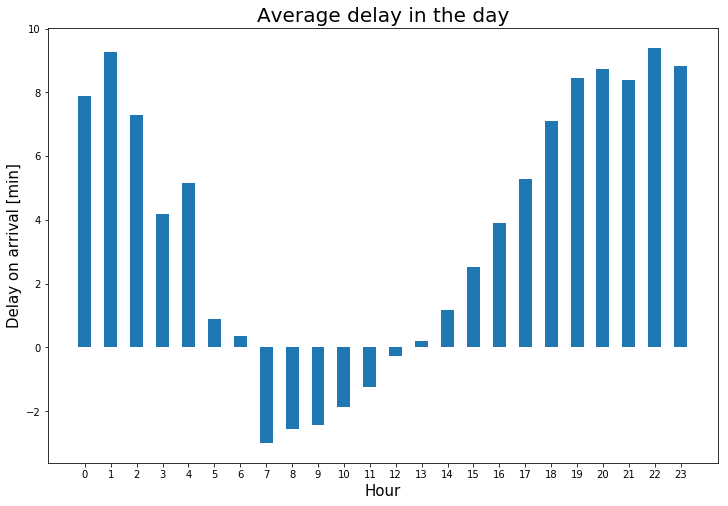

In [13]:
g = data.groupby(data.index.hour).arr_delay.mean()
fig = plt.figure(figsize=(12,8))
ax = plt.bar(g.index, g, width=0.5)
#data.groupby('arr_day').arr_delay.mean().plot(kind="bar")
plt.title("Average delay in the day", fontsize=20)
plt.ylabel("Delay on arrival [min]", fontsize=15)
plt.xlabel("Hour", fontsize=15)
plt.xticks(g.index);

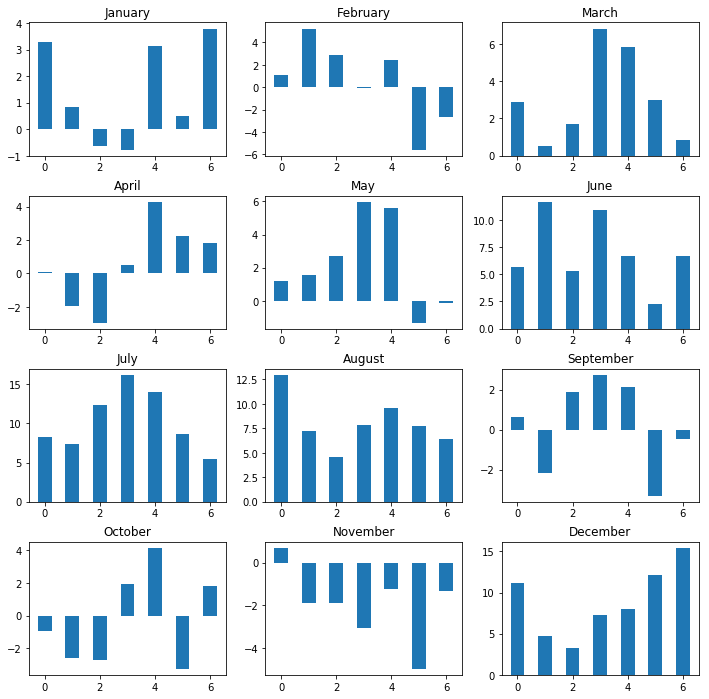

In [14]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.3)

for k, i in enumerate(liste_months):
    plt.subplot(4,3,k+1)
    g = data.groupby('month').get_group(k+1)
    g = g.groupby(g.index.dayofweek).arr_delay.mean()
    ax = plt.bar(g.index, g, width=0.5)
    plt.title(i)

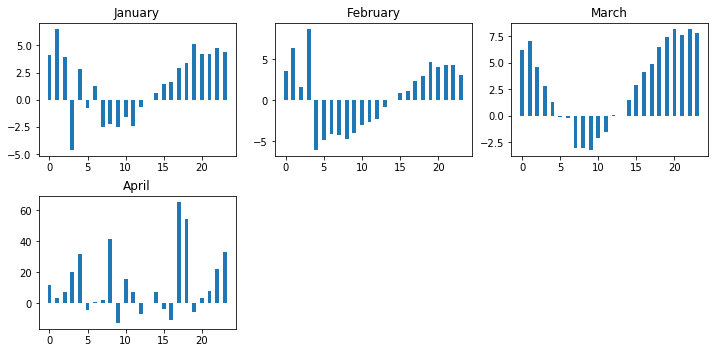

In [13]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.3)

for k, i in enumerate(liste_months):
    plt.subplot(4,3,k+1)
    g = data.groupby('month').get_group(k+1)
    g = g.groupby(g.index.hour).arr_delay.mean()
    ax = plt.bar(g.index, g, width=0.5)
    plt.title(i)

# Delay by airline carrier

In [15]:
carrier_group = data.groupby("op_unique_carrier")
fl_per_carrier = carrier_group.arr_delay.count()
delay_per_fl = carrier_group.arr_delay.mean()/fl_per_carrier
carrier_idx = list(carrier_group.groups.keys())

<BarContainer object of 12 artists>

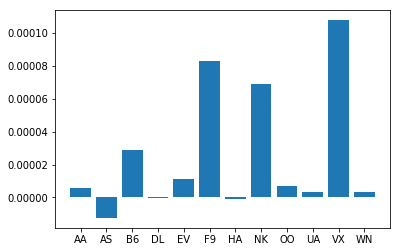

In [16]:
fig = plt.figure()
plt.bar(carrier_idx , delay_per_fl)

# Influence of school holidays

Text(0.5,0,'vacation')

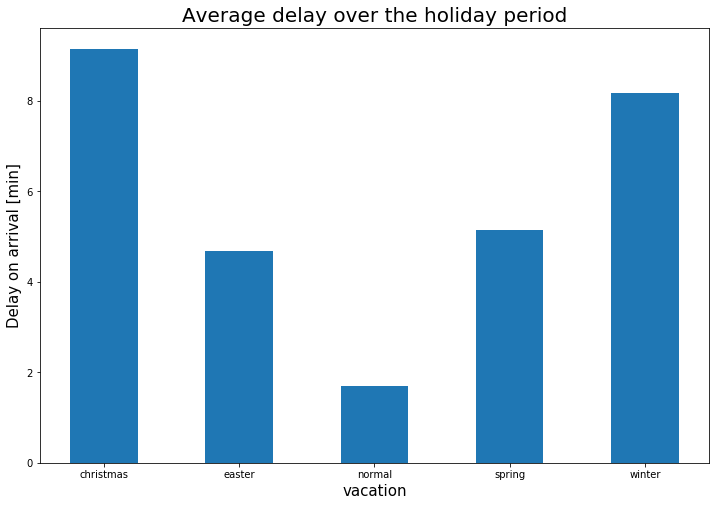

In [18]:
g = data.groupby("holidays").arr_delay.mean()
fig = plt.figure(figsize=(12,8))
ax = plt.bar(g.index, g, width=0.5)
#data.groupby('arr_day').arr_delay.mean().plot(kind="bar")
plt.title("Average delay over the holiday period", fontsize=20)
plt.ylabel("Delay on arrival [min]", fontsize=15)
plt.xlabel("vacation", fontsize=15)
#plt.xticks(g.index, labels=g.index);

# Delay by airline carrier

In [19]:
carrier_group = data.groupby("op_unique_carrier")
fl_per_carrier = carrier_group.arr_delay.count()
delay_per_fl = carrier_group.arr_delay.mean()/fl_per_carrier
carrier_idx = list(carrier_group.groups.keys())

<BarContainer object of 12 artists>

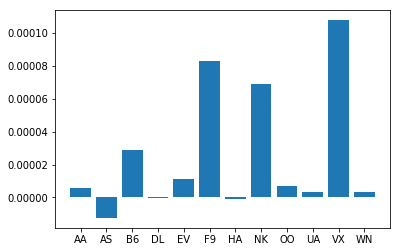

In [20]:
fig = plt.figure()
plt.bar(carrier_idx , delay_per_fl)

# Influence of school holidays

Text(0.5,0,'vacances')

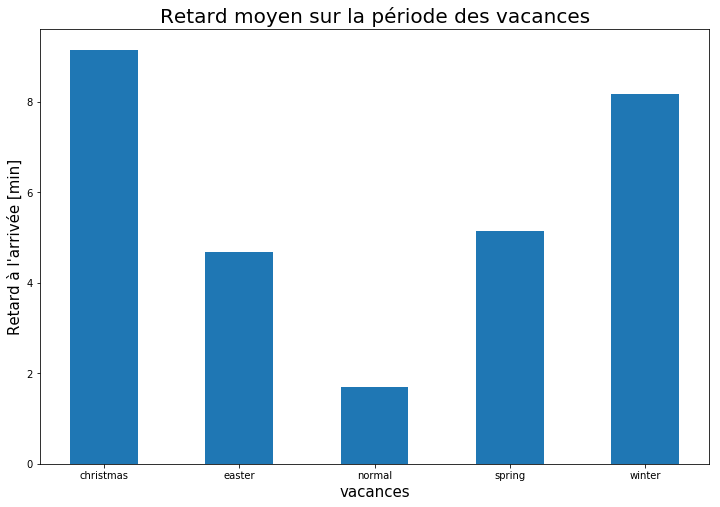

In [23]:
g = data.groupby("holidays").arr_delay.mean()
fig = plt.figure(figsize=(12,8))
ax = plt.bar(g.index, g, width=0.5)
#data.groupby('arr_day').arr_delay.mean().plot(kind="bar")
plt.title("Retard moyen sur la période des vacances", fontsize=20)
plt.ylabel("Retard à l'arrivée [min]", fontsize=15)
plt.xlabel("vacances", fontsize=15)
#plt.xticks(g.index, labels=g.index);

# Distribution of delay on arrival

Text(0,0.5,'Frequency')

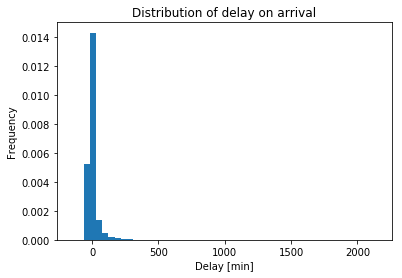

In [24]:
plt.hist(data.arr_delay, bins=50, density=True)
plt.title("Distribution of delay on arrival")
plt.xlabel("Delay [min]")
plt.ylabel("Frequency")

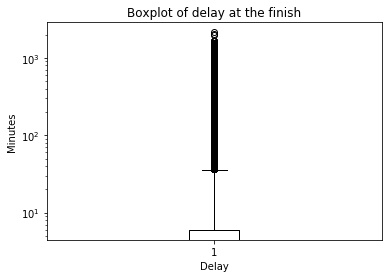

In [25]:
plt.boxplot(data.arr_delay)
plt.title("Boxplot of delay at the finish")
plt.xlabel("Delay")
plt.ylabel("Minutes")
plt.yscale("log")

## Treating the outliers

In [27]:
def supp_outliers(df, col):

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    inf  = q1 - 1.5 * iqr
    sup = q3 + 1.5 * iqr
    df_out = df.loc[(df[col] > inf) & (df[col] < sup)]
    
    obs_supp = df.shape[0] - df_out.shape[0]
    ratio = (obs_supp/df.shape[0])*100
    
    
    print("Lower terminals : [{0:.0f}]".format(inf))
    print("Upper terminals : [{0:.0f}]".format(sup))
    print("Number of outliers removed : {0} ({1:.0f}% datas)".format(obs_supp, ratio))
    
    return df_out

In [28]:
data = supp_outliers(data, "arr_delay")

Lower terminals : [-44]
Upper terminals : [36]
Number of outliers removed : 526545 (10% datas)


Text(0,0.5,'Frequency')

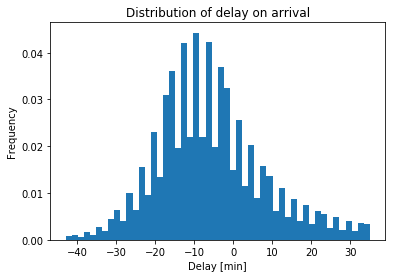

In [29]:
plt.hist(data.arr_delay, bins=50, density=True)
plt.title("Distribution of delay on arrival")
plt.xlabel("Delay [min]")
plt.ylabel("Frequency")

Text(0,0.5,'Minutes')

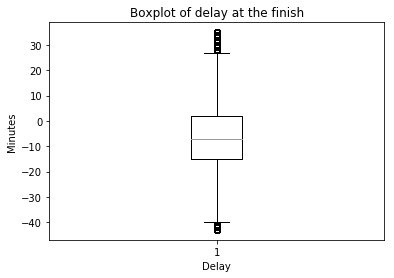

In [30]:
plt.boxplot(data.arr_delay)
plt.title("Boxplot of delay at the finish")
plt.xlabel("Delay")
plt.ylabel("Minutes")